In [127]:
import pickle
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn import metrics 
from statsmodels.formula.api import logit
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score


In [4]:
data = sm.datasets.fair.load_pandas().data

In [5]:
data['affair'] = (data['affairs'] > 0).astype(float)

In [6]:
print( sm.datasets.fair.NOTE)

::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                        or unskilled worker; 3 = white-colloar; 4 = teacher
                        counselor social worker, nurse; artist, writers;
          

In [7]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1.0


In [8]:
data.isna().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

In [9]:
data.shape

(6366, 10)

In [10]:
data["affair"].value_counts()

0.0    4313
1.0    2053
Name: affair, dtype: int64

In [11]:
data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


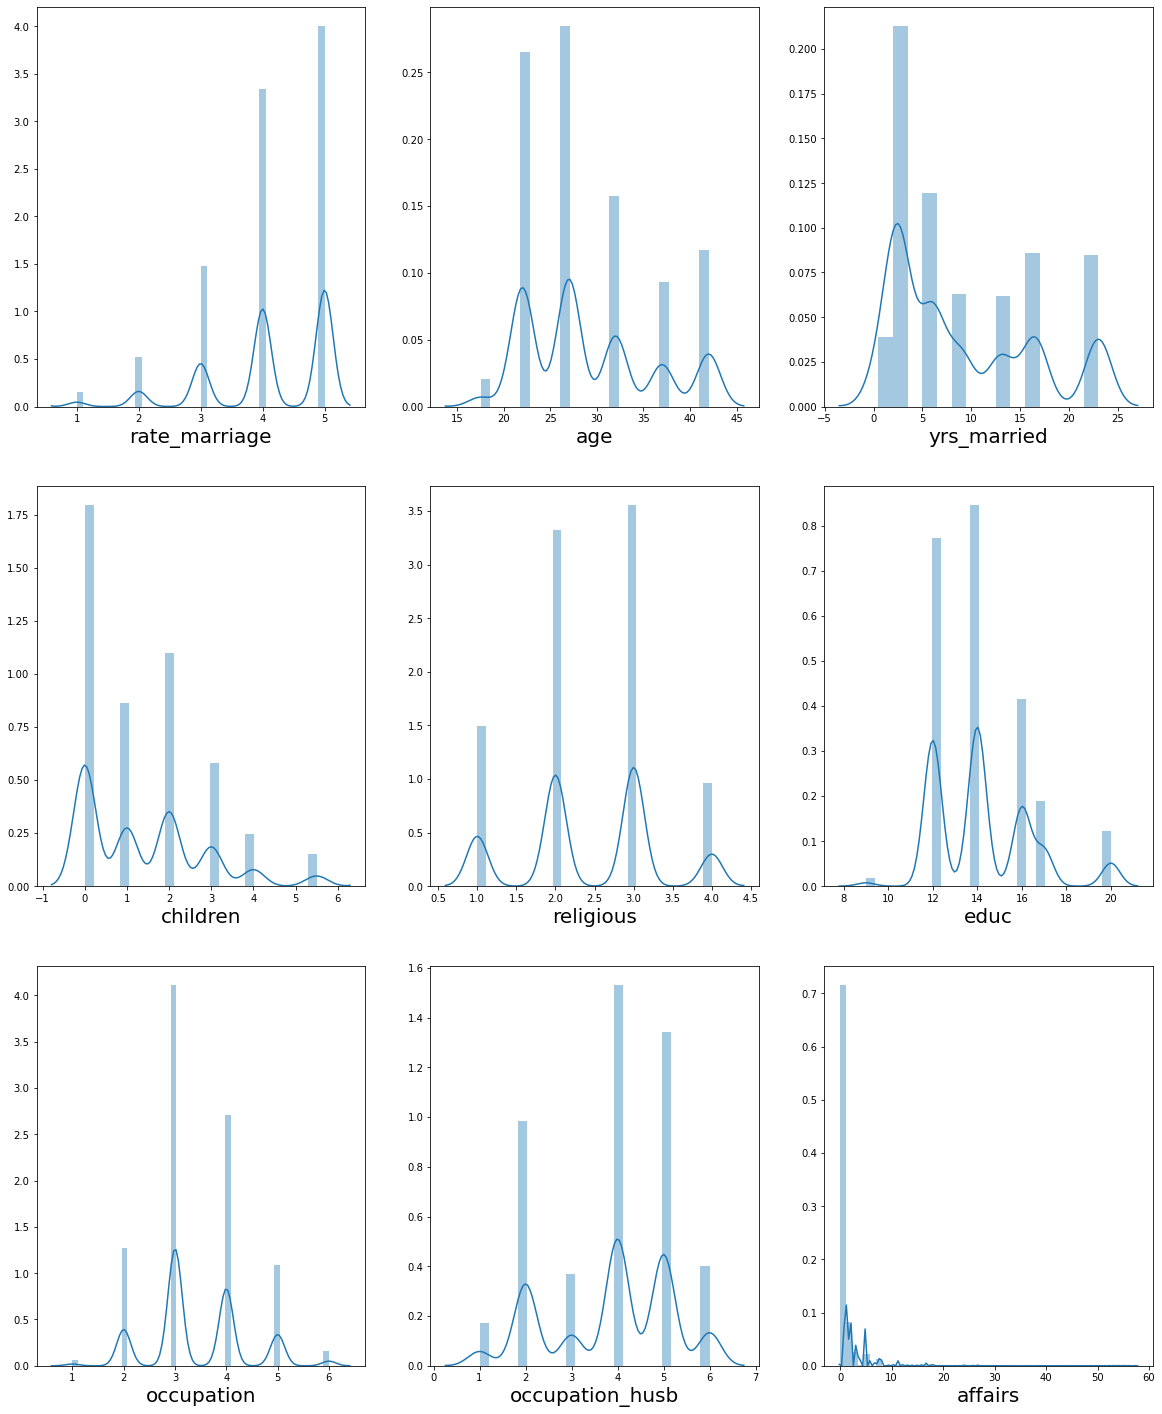

In [16]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 : 
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

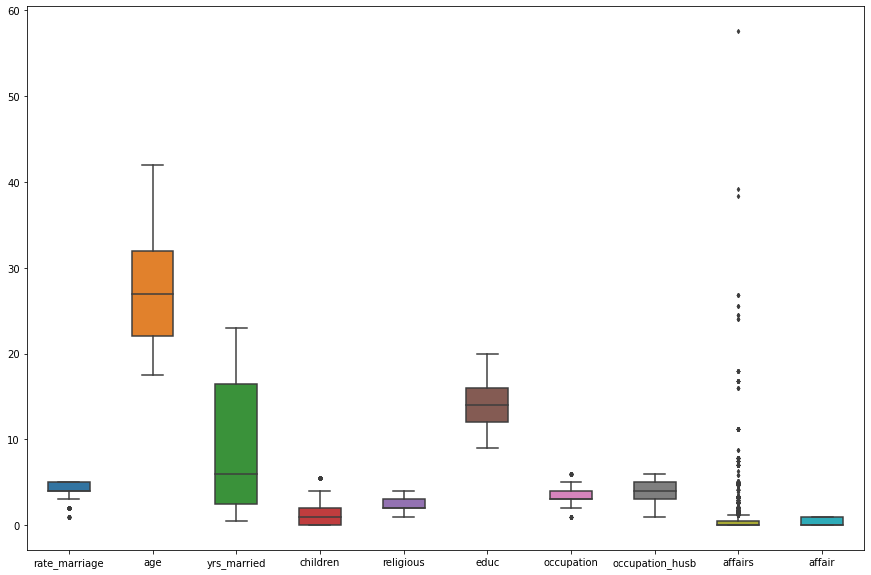

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [136]:
x=data1[['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ','occupation', 'occupation_husb']]
Y=data1 ['affair']

In [137]:
x= sm.add_constant(X)
ols = sm.OLS(Y,X).fit()

In [139]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 affair   R-squared (uncentered):                   0.382
Model:                            OLS   Adj. R-squared (uncentered):              0.381
Method:                 Least Squares   F-statistic:                              490.6
Date:                Sun, 16 Aug 2020   Prob (F-statistic):                        0.00
Time:                        01:31:11   Log-Likelihood:                         -3900.6
No. Observations:                6366   AIC:                                      7817.
Df Residuals:                    6358   BIC:                                      7871.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
rate_marriage      -0.0981      0.006    -16.188      0.000      -0.110      -0.086
age                 0.0117      0.002      7.143      0.000       0.008       0.015
yrs_married         0.0031      0.002      1.640      0.101      -0.001       0.007
children            0.0109      0.006      1.754      0.080      -0.001       0.023
religious          -0.0432      0.006     -6.734      0.000      -0.056      -0.031
educ                0.0183      0.003      6.750      0.000       0.013       0.024
occupation          0.0404      0.007      6.032      0.000       0.027       0.054
occupation_husb     0.0108      0.004      2.503      0.012       0.002       0.019
==============================================================================
Omnibus:                     2610.061   Durbin-Watson:                   0.245
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              708.674
Skew:                           0.614   Prob(JB):                    1.30e-154
Kurtosis:                       1.921   Cond. No.                         43.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
data1=data.copy()

In [70]:
data1.drop('affairs',inplace=True,axis=1)

In [74]:
data1.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1.0


<AxesSubplot:>

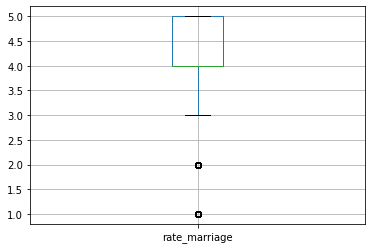

In [75]:
data.boxplot(column = "rate_marriage")

In [76]:
IQR_marge = data1.rate_marriage.quantile(0.75)-data1.rate_marriage.quantile(0.25)
IQR_marge

1.0

In [77]:
data1.rate_marriage.quantile(0.75)

5.0

In [78]:
lower_bound=data1["rate_marriage"].quantile(0.25)-(IQR_marge*1.5)
higher_bound=data1["rate_marriage"].quantile(0.75)+(IQR_marge*1.5)
print(lower_bound), print(higher_bound)

2.5
6.5


(None, None)

In [79]:
data1.loc[data1["rate_marriage"]<=2.5, "rate_marriage"]=2.5

<AxesSubplot:>

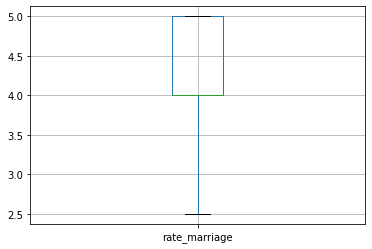

In [80]:
data1.boxplot(column = "rate_marriage")

<AxesSubplot:>

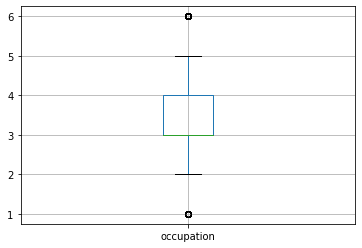

In [81]:
data.boxplot(column = "occupation")

In [82]:
IQR_ocu = data1.occupation.quantile(0.75)-data1.occupation.quantile(0.25)
IQR_ocu

1.0

In [83]:
data1.occupation.quantile(0.75)

4.0

In [84]:
lower=data1["occupation"].quantile(0.25)-(IQR_marge*1.5)
higher=data1["occupation"].quantile(0.75)+(IQR_marge*1.5)
print(lower), print(higher)

1.5
5.5


(None, None)

In [85]:
data1.loc[data1["occupation"]<=1.5, "occupation"]=1.5
data1.loc[data1["occupation"]>=5.5, "occupation"]=5.5

<AxesSubplot:>

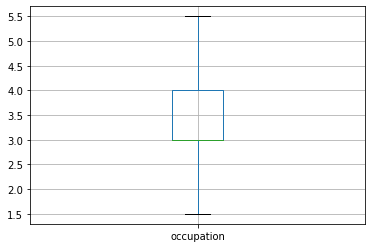

In [86]:
data1.boxplot(column = "occupation")

<AxesSubplot:>

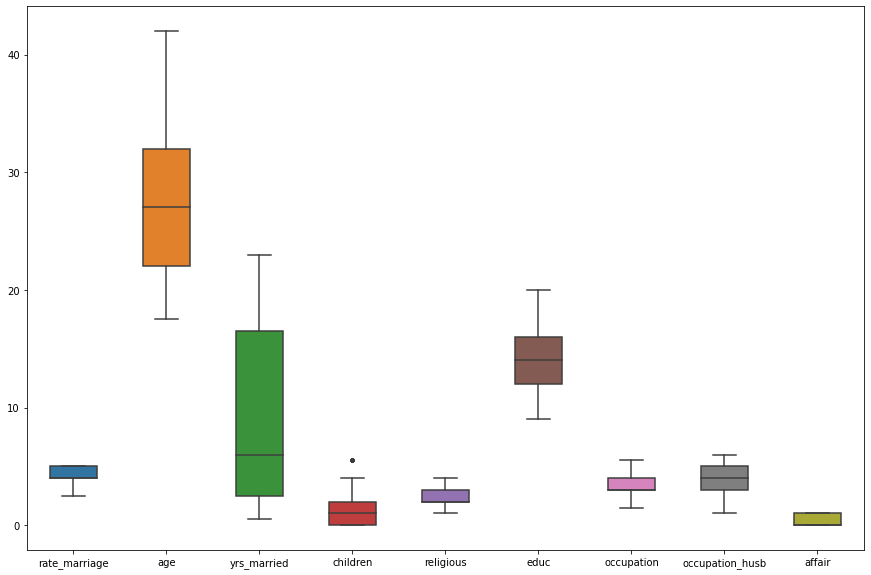

In [87]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data1, width= 0.5,ax=ax,  fliersize=3)

In [88]:
corrmat=data1.corr()
corrmat

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
rate_marriage,1.000000,-0.101052,-0.120857,-0.122106,0.083762,0.081399,0.037383,0.029348,-0.331694
age,-0.101052,1.000000,0.894082,0.673902,0.136598,0.027960,0.105450,0.162567,0.146519
yrs_married,-0.120857,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041876,0.128135,0.203109
children,-0.122106,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.014767,0.086660,0.159833
religious,0.083762,0.136598,0.132683,0.141845,1.000000,0.032245,0.035510,0.004061,-0.129299
educ,0.081399,0.027960,-0.109058,-0.141918,0.032245,1.000000,0.379558,0.183932,-0.075280
occupation,0.037383,0.105450,0.041876,-0.014767,0.035510,0.379558,1.000000,0.198529,0.027866
occupation_husb,0.029348,0.162567,0.128135,0.086660,0.004061,0.183932,0.198529,1.000000,0.017637
affair,-0.331694,0.146519,0.203109,0.159833,-0.129299,-0.075280,0.027866,0.017637,1.000000


<AxesSubplot:>

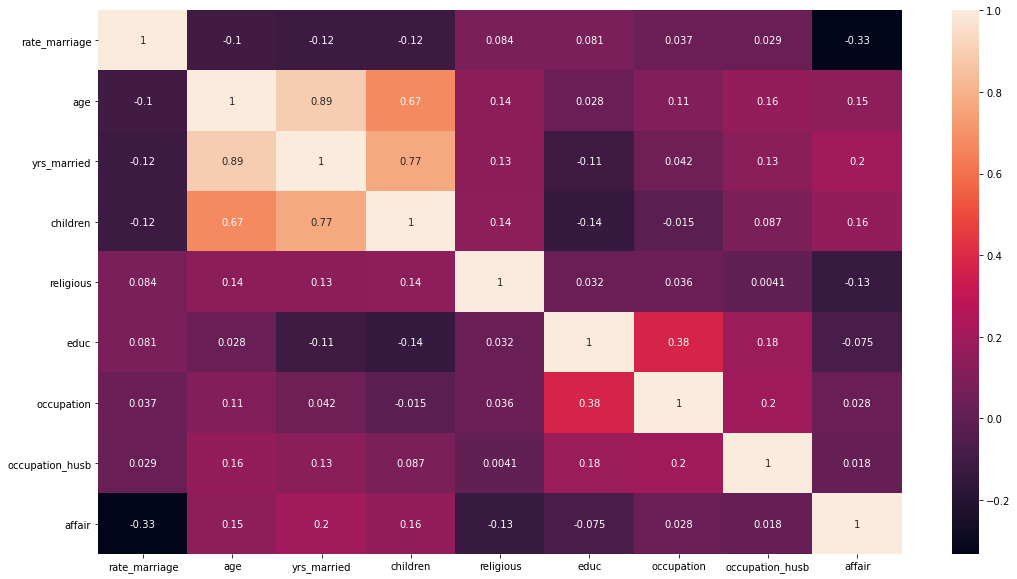

In [89]:
fig, ax = plt.subplots(figsize = (18,10))
sns.heatmap(corrmat, annot=True, annot_kws={"size":10})

<AxesSubplot:ylabel='Frequency'>

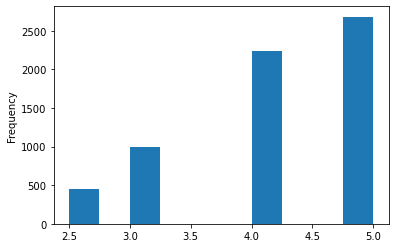

In [90]:
data1['rate_marriage'].plot.hist()

In [91]:
X=data1.drop('affair',axis=1)
y=data1['affair']

In [92]:
X.shape

(6366, 8)

In [93]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [95]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

In [102]:
vif.sort_values(by="vif",ascending = False)

,vif,Features
2,7.143729,yrs_married
1,5.452766,age
3,2.528626,children
5,1.294256,educ
6,1.202820,occupation
7,1.082201,occupation_husb
4,1.037646,religious
0,1.033394,rate_marriage


In [103]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.20, random_state = 35)

In [104]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [128]:
with open( 'final_Prediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

In [105]:
predicted = log_reg.predict(x_test)

In [109]:
df=pd.DataFrame(data = [predicted, y_test])
df.T

,0,1
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,0.0,1.0
4,0.0,0.0
...,...,...
1269,0.0,1.0
1270,0.0,1.0
1271,0.0,0.0
1272,0.0,0.0


In [114]:
accuracy = accuracy_score(y_test,predicted)
accuracy

0.7205651491365777

In [115]:
conf_mat = confusion_matrix(y_test,predicted)
conf_mat

array([[757,  96],
       [260, 161]], dtype=int64)

In [116]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [118]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7205651491365777

In [120]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.8874560375146542

In [121]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.744346116027532

In [122]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.809625668449198

In [123]:
auc = roc_auc_score(y_test, predicted)
auc

0.6349394201825052

In [124]:
fpr, tpr, thresholds = roc_curve(y_test, predicted)

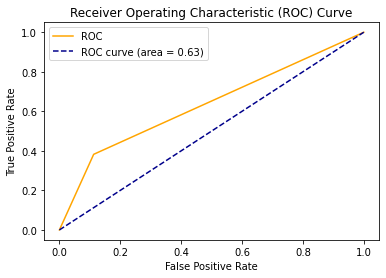

In [125]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [126]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[757  96]
 [260 161]]
              precision    recall  f1-score   support

         0.0       0.74      0.89      0.81       853
         1.0       0.63      0.38      0.47       421

    accuracy                           0.72      1274
   macro avg       0.69      0.63      0.64      1274
weighted avg       0.71      0.72      0.70      1274

